In [1]:
import pandas as pd
import numpy as np

In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"

!wget $data

--2021-09-18 11:37:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  24.5MB/s    in 0.3s    

2021-09-18 11:37:11 (24.5 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [5]:
df = pd.read_csv("AB_NYC_2019.csv") # EDA
df.shape

(48895, 16)

In [6]:
df.head

<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

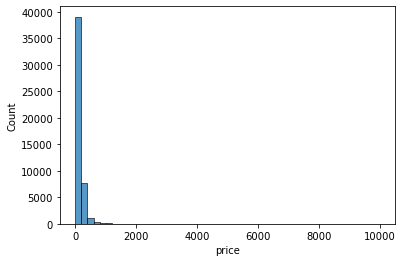

In [16]:
sns.histplot(df.price, bins=50)

In [13]:
s = pd.Series(df['price'])
s.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

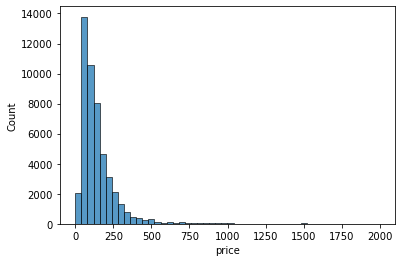

In [26]:
sns.histplot(df.price[df.price < 2000], bins=50) # EDA: Long Tail: Yes

In [27]:
feature_cols = ['latitude', 'longitude', 'price',
        'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df[feature_cols]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [29]:
df_feature_set = df[feature_cols]
df_feature_set.isnull().sum()  #Q1: reviews_per_month has 10052 missing values

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [31]:
min_nights_series = pd.Series(df_feature_set['minimum_nights']) #Q2: 50 percentile is 3.000000
min_nights_series.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [32]:
n = len(df_feature_set)
n

48895

In [33]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [35]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(29337, 9779, 9779)

In [36]:
df_train = df_feature_set.iloc[idx[:n_train]]
df_val = df_feature_set.iloc[idx[n_train:n_train+n_val]]
df_test = df_feature_set.iloc[idx[n_train+n_val:]]
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [40]:
del df_train['price']
del df_val['price']
del df_test['price']

In [41]:
len(y_train), len(y_val), len(y_test)

(29337, 9779, 9779)

In [42]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


In [45]:
df_feature_set['minimum_nights'].nunique()
df_feature_set['availability_365'].nunique()
df_feature_set.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [46]:
def prepare_X(df,na_val = 0):
    df = df.copy()
    
    df_num = df[feature_cols]
    df_num = df_num.fillna(na_val)
    X = df_num.values

    return X

In [47]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [48]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [50]:
feature_cols = ['latitude', 'longitude',
        'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(-419.91265634211527,
 array([ 1.30676225e+00, -5.02167852e+00, -5.59803107e-04, -4.07634895e-04,
        -8.25470078e-03,  1.33371320e-03,  6.50203889e-04]))

In [54]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_with_0 = rmse(y_val, y_pred) # Q3: RMSE with fill na 0
round(score_with_0,2)

0.64

In [52]:
na_mean = df_train['reviews_per_month'].mean()
na_mean

1.3685492094777056

In [55]:
X_train = prepare_X(df_train,na_mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_with_mean = rmse(y_val, y_pred)
round(score_with_mean,2) # Q3: RMSE fill na with mean

0.64

In [56]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [59]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, round(score,2)) #Q4: [0, 0.000001, 0.0001, 0.001] all gives 0.64 Score. Choosing 0.000001

0 0.64
1e-06 0.64
0.0001 0.64
0.001 0.64
0.01 0.66
0.1 0.68
1 0.68
5 0.68
10 0.68


In [68]:
def split_data_for_seed(s):
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    df_train = df_feature_set.iloc[idx[:n_train]]
    df_val = df_feature_set.iloc[idx[n_train:n_train+n_val]]
    df_test = df_feature_set.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    return df_train, y_train, df_val, y_val, df_test, y_test

In [69]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    df_train, y_train, df_val, y_val, df_test, y_test = split_data_for_seed(seed)

    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score_with_0 = rmse(y_val, y_pred) 
    rmse_scores.append(round(score_with_0,3))

In [70]:
rmse_scores

[0.655, 0.646, 0.648, 0.638, 0.645, 0.631, 0.63, 0.651, 0.649, 0.644]

In [71]:
std_dev = np.std(rmse_scores)

In [72]:
round(std_dev,3) #Q5: standard deviation of RMSE scores = 0.008

0.008

In [73]:
df_train, y_train, df_val, y_val, df_test, y_test = split_data_for_seed(9)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train,0)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score # Q6: RMSE on test data set

0.6452771349036991